In [1]:
import keras
keras.__version__

'2.11.0'

In [20]:
import numpy as np

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 5s 0us/step


In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 1s 1us/step


In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [12]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [13]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.4996 - binary_accuracy: 0.8017 - val_loss: 0.3864 - val_binary_accuracy: 0.8627
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.3010 - binary_accuracy: 0.9034 - val_loss: 0.3143 - val_binary_accuracy: 0.8803
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2191 - binary_accuracy: 0.9283 - val_loss: 0.2816 - val_binary_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1757 - binary_accuracy: 0.9414 - val_loss: 0.2757 - val_binary_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1380 - binary_accuracy: 0.9574 - val_loss: 0.2823 - val_binary_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1158 - binary_accuracy: 0.9623 - val_loss: 0.3197 - val_binary_accuracy: 0.8773
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - los

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

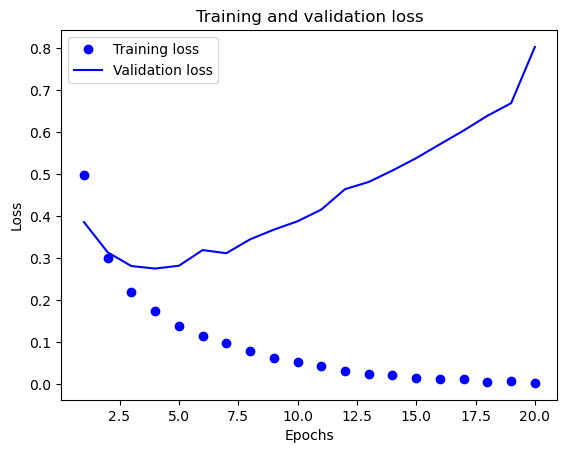

In [26]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

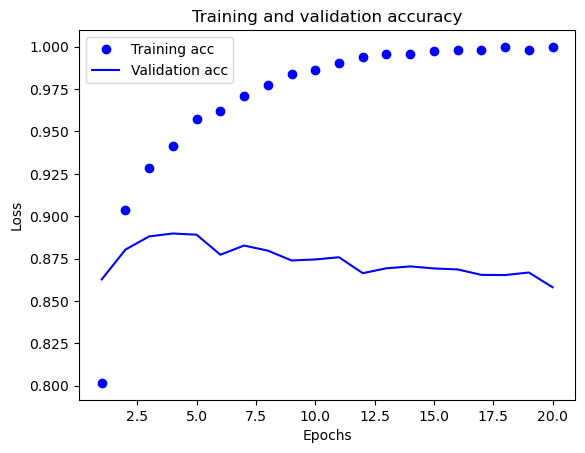

In [28]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4602 - accuracy: 0.8112
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2723 - accuracy: 0.9036
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2147 - accuracy: 0.9201
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2864 - accuracy: 0.8867


In [30]:
results

[0.2864058315753937, 0.886680006980896]

In [31]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.19456068],
       [0.99918157],
       [0.8034675 ],
       ...,
       [0.09441707],
       [0.11285134],
       [0.5017985 ]], dtype=float32)